In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
from pyDort.tracking.data_pipe import ArgoverseTrackingInferenceDataset
from matplotlib import pyplot as plt 

In [3]:
dataset = ArgoverseTrackingInferenceDataset(
    data_dir = '/home/shivampr21/Research/datasets/argoverse-tracking/train1/',
    dets_dump_dir = '/home/shivampr21/Research/datasets/argoverse-tracking/test/argoverse_detections_2020/training/',
    log_id = '',
    lidar_points_thresh = 30,
    image_size_threshold = 50,
    n_img_view_aug = 7,
    aug_transforms = None,
    central_crop = True,
    img_tr_ww = (0.7, 0.7),
    discard_invalid_dfs = True,
    img_reshape = (64, 64)
)

In [4]:
n_logs = len(dataset.log_list)
print(f'Number of logs: {n_logs}')

Number of logs: 20


In [5]:
dataset.dataset_init(0)

In [6]:
info_frames = dataset[0]

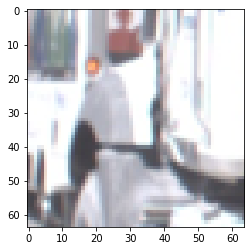

In [7]:
plt.imshow(info_frames[16].img_data[5].numpy().transpose(1, 2, 0))
plt.show()

In [8]:
import open3d as o3d

Jupyter environment detected. Enabling Open3D WebVisualizer.
[Open3D INFO] WebRTC GUI backend enabled.
[Open3D INFO] WebRTCWindowSystem: HTTP handshake server disabled.


In [15]:
for i in range(len(dataset)):
    info_frames = dataset[0]
    for frame in info_frames:
        if frame.object_type == "PEDESTRIAN":
            pts = frame.lidar
            pcd = o3d.geometry.PointCloud()
            pcd.points = o3d.utility.Vector3dVector(pts)
            o3d.visualization.draw_geometries([pcd])

KeyboardInterrupt: 

In [46]:
from pyDort.representation.point_cloud_models.pointcloud import PointCloudRepresentation

In [47]:
rep = PointCloudRepresentation(model="dgcnn2048", chunk_size=10)

In [48]:
repr_ = rep(dataset[0])

In [49]:
repr_[0].shape

(19, 512)

In [ ]:
from argoverse.utils.calibration import get_calibration_config, get_camera_extrinsic_matrix

In [ ]:
get_calibration_config(dataset.calib_data, 'ring_front_center')

In [ ]:
from argoverse.utils.camera_stats import CAMERA_LIST

In [ ]:
CAMERA_LIST

In [ ]:
dataset.calib_data['ring_front_center'].calib_data['value']

In [1]:
import numpy as np

In [6]:
def dsc_data_association_costmatrix(dets : np.ndarray,
                                    trks : np.ndarray) -> np.ndarray:
        # dets : [M, n]
        # trks : [N, n]
        dets /= (np.linalg.norm(dets, axis=1, keepdims=True)+1e-10)
        trks /= (np.linalg.norm(trks, axis=1, keepdims=True)+1e-10)

        cost_matrix : np.ndarray = -dets.dot(trks.T) # [M, N] matrix
        cost_matrix -= cost_matrix.min()
        cost_matrix /= (cost_matrix.max()+1e-9)

        return cost_matrix

In [9]:
dets = np.random.rand(10, 128)
dets_ = dets
trks = np.random.rand(20, 128)
trks_ = trks

In [12]:
dets

array([[0.03448104, 0.09651217, 0.11751384, ..., 0.09820259, 0.04421617,
        0.04633273],
       [0.0490487 , 0.11220958, 0.07157902, ..., 0.02468071, 0.12126727,
        0.12327038],
       [0.05046629, 0.0920659 , 0.12161145, ..., 0.11090679, 0.02216982,
        0.05526879],
       ...,
       [0.00899845, 0.05285323, 0.02322775, ..., 0.00984874, 0.06302188,
        0.12061234],
       [0.0872572 , 0.08506924, 0.11251184, ..., 0.13219115, 0.03225873,
        0.02977503],
       [0.00885421, 0.04206392, 0.11656784, ..., 0.16160398, 0.09996795,
        0.0653161 ]])

In [13]:
csm = dsc_data_association_costmatrix(dets, trks)

In [14]:
dets

array([[0.03448104, 0.09651217, 0.11751384, ..., 0.09820259, 0.04421617,
        0.04633273],
       [0.0490487 , 0.11220958, 0.07157902, ..., 0.02468071, 0.12126727,
        0.12327038],
       [0.05046629, 0.0920659 , 0.12161145, ..., 0.11090679, 0.02216982,
        0.05526879],
       ...,
       [0.00899845, 0.05285323, 0.02322775, ..., 0.00984874, 0.06302188,
        0.12061234],
       [0.0872572 , 0.08506924, 0.11251184, ..., 0.13219115, 0.03225873,
        0.02977503],
       [0.00885421, 0.04206392, 0.11656784, ..., 0.16160398, 0.09996795,
        0.0653161 ]])

array([[0.65676493, 0.20802001, 0.64046135, 0.4223321 , 0.39905759,
        0.16964071, 0.66252346, 0.17792049, 0.73813953, 0.52984388,
        0.19538827, 0.5842416 , 0.32691085, 0.68910098, 0.38429995,
        0.39078952, 0.46882581, 0.7959899 , 0.28890676, 0.52612231],
       [0.34223534, 0.25321572, 0.4709422 , 0.54341516, 0.55508369,
        0.02831118, 0.23489351, 0.06816584, 0.31548412, 0.43268913,
        0.14743961, 0.41188292, 0.47540388, 0.16719922, 0.19953727,
        0.48153927, 0.37224419, 0.32286818, 0.25623549, 0.58968456],
       [0.99999999, 0.60502488, 0.49177533, 0.7868505 , 0.47468519,
        0.62278313, 0.55783523, 0.30451038, 0.61695119, 0.59899142,
        0.52302807, 0.49937264, 0.11153858, 0.73029871, 0.47817038,
        0.30301423, 0.49172011, 0.66677657, 0.49825803, 0.44305271],
       [0.6276656 , 0.6242544 , 0.5465681 , 0.47415439, 0.48680897,
        0.46778573, 0.2609023 , 0.32509184, 0.47282459, 0.44660785,
        0.03526743, 0.67938055, 0.38109608, 0

In [1]:
for idx in range(0, 10, 2):
    print(idx)

0
2
4
6
8
